# Intro to Plotting and Fitting

In [1]:
import qexpy as q
import qexpy.plotting as plt

The plotting module of QExPy is a wrapper for matplotlib.pyplot, developed to interface with QExPy data structures.

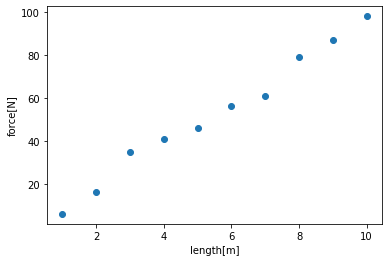

In [2]:
# let's start by creating some arrays of measurement
xdata = q.MeasurementArray([1,2,3,4,5,6,7,8,9,10], unit="m", name="length")
ydata = q.MeasurementArray([6,16,35,41,46,56,61,79,87,98], error=5, unit="N", name="force")

# now we can add them to a simple plot
plt.plot(xdata, ydata, name="first")
# use `figure = plt.plot(xdata, ydata)` to obtain the Plot instance for further customization.
# qexpy.plotting keeps a buffer of the latest Plot instance, if you did not assign the return 
# value of plt.plot to anything (like what we are doing here), you can still retrieve the Plot
# instance using `figure = plt.get_plot()`, as shown below.

# draw the plot to the screen
plt.show()

As you can see in the plot above, the name and units of the data that's passed in are automatically added to the plot as axis labels. For simple plotting purposes, this is enough. However, if you wish to further customize the plot, you can try to operate directly on the plot object. You will be able to change the title as well as the axis labels yourself. You can also add error bars and legends to the plot.

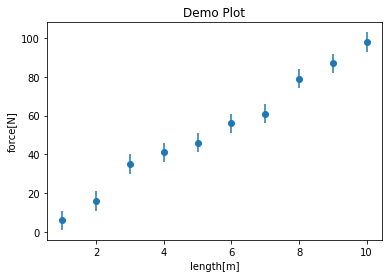

In [3]:
# retrieve the current plot object
figure = plt.get_plot()

# we can also add error bars to the plot
figure.error_bars()  # use `figure.error_bars(false)` to turn off error bars

# we can add a title to the plot
figure.title = "Demo Plot"

# finally draw the plot
figure.show()

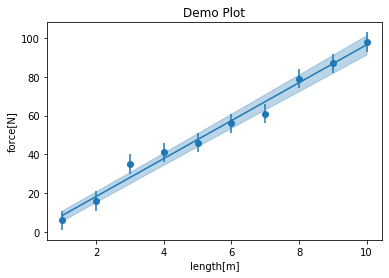

----------------- Fit Results -------------------
Fit of first to linear

Result Parameter List: 
slope = 9.8 +/- 0.4,
intercept = -1 +/- 3

Correlation Matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 4.75/7

----------------- End Fit Results -------------------


In [4]:
# we can try to add a fit to the plot
result = figure.fit(model=q.FitModel.LINEAR)

# show the plot and the result
figure.show()
print(result)

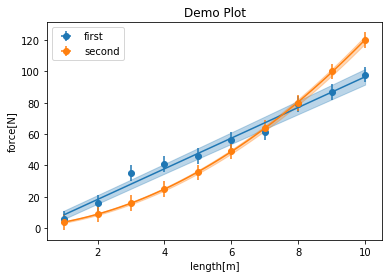

In [5]:
# we can add multiple datasets to plot
figure.plot(xdata=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ydata=[3.8, 8.9, 16, 24.8, 35.5, 48.9, 64, 80, 100, 120],
            xerr=0.05, yerr=5, name="second")

# we can also add a line of best fit to the plot
figure.fit(model=q.FitModel.QUADRATIC)

# we can add turn on legends for the plot since we now have 2 data sets
figure.legend()

# now show the figure
figure.show()